In [1]:
import sys
sys.path.insert(0, '../..')

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import edunn as nn
from edunn import utils

In [3]:
np.set_printoptions(threshold=sys.maxsize)

# RMSprop

In [4]:
#Modelo falso con un vector de parámetros con valor inicial [0,0] y gradientes que siempre son [1,-11]
model = nn.FakeModel(parameter=np.array([0,0]),gradient=np.array([1, -1]))
# función de error falso cuyo error es siempre 1 y las derivadas también
error = nn.FakeError(error=1,derivative_value=1)

# Conjunto de datos falso, que no se utilizará realmente
fake_samples = 3
fake_x = np.random.rand(fake_samples,10)
fake_y = np.random.rand(fake_samples,5)

# Optimizar el modelo por 1 época con lr=2
optimizer = nn.RMSprop(batch_size=fake_samples,epochs=1,lr=2,shuffle=False)
history = optimizer.optimize(model,fake_x,fake_y,error,verbose=False)
expected_parameters=np.array([-19,19])
utils.check_same(expected_parameters,model.get_parameters()["parameter"])

# Optimizar el modelo por 1 época *adicional* con lr=2
history = optimizer.optimize(model,fake_x,fake_y,error,verbose=False)
expected_parameters=np.array([-33,33])
utils.check_same(expected_parameters,model.get_parameters()["parameter"])
    
# Optimizar el modelo por 3 épocas más, ahora con con lr=1    
optimizer = nn.RMSprop(batch_size=fake_samples,epochs=3,lr=1,shuffle=False)
history = optimizer.optimize(model,fake_x,fake_y,error,verbose=False)
expected_parameters=np.array([-54,54])
utils.check_same(expected_parameters,model.get_parameters()["parameter"])    

SUCCESS :) Arrays are equal (tolerance 1e-12)
SUCCESS :) Arrays are equal (tolerance 1e-12)
SUCCESS :) Arrays are equal (tolerance 1e-12)


# Adam

In [5]:
#Modelo falso con un vector de parámetros con valor inicial [0,0] y gradientes que siempre son [1,-11]
model = nn.FakeModel(parameter=np.array([0,0]),gradient=np.array([1, -1]))
# función de error falso cuyo error es siempre 1 y las derivadas también
error = nn.FakeError(error=1,derivative_value=1)

# Conjunto de datos falso, que no se utilizará realmente
fake_samples = 3
fake_x = np.random.rand(fake_samples,10)
fake_y = np.random.rand(fake_samples,5)

# Optimizar el modelo por 1 época con lr=2
optimizer = nn.Adam(batch_size=fake_samples,epochs=1,lr=2,shuffle=False)
history = optimizer.optimize(model,fake_x,fake_y,error,verbose=False)
expected_parameters=np.array([-1,1])
utils.check_same(expected_parameters,model.get_parameters()["parameter"])

# Optimizar el modelo por 1 época *adicional* con lr=2
history = optimizer.optimize(model,fake_x,fake_y,error,verbose=False)
expected_parameters=np.array([-3,3])
utils.check_same(expected_parameters,model.get_parameters()["parameter"])
    
# Optimizar el modelo por 3 épocas más, ahora con con lr=1    
optimizer = nn.Adam(batch_size=fake_samples,epochs=3,lr=1,shuffle=False)
history = optimizer.optimize(model,fake_x,fake_y,error,verbose=False)
expected_parameters=np.array([-5,5])
utils.check_same(expected_parameters,model.get_parameters()["parameter"])    

SUCCESS :) Arrays are equal (tolerance 1e-12)
SUCCESS :) Arrays are equal (tolerance 1e-12)
SUCCESS :) Arrays are equal (tolerance 1e-12)


---

# Comprobaciones mediante entrenamiento

In [6]:
x,y,classes=nn.datasets.load_classification("mnist")
# normalización de los datos
x = (x-x.mean())/x.std()
n, din = x.shape
# calcular cantidad de clases
classes = y.max()+1
print("Tamaños de x e y:", x.shape,y.shape)
x.min(), x.max()

Tamaños de x e y: (1200, 784) (1200,)


(-0.4290351103874587, 2.7838089919296496)

## RMSprop

In [7]:
hidden_dim=32
#Red con dos capas 
model = nn.Sequential([nn.Dense(din,hidden_dim,activation_name="relu"),
                       nn.Dense(hidden_dim,classes,activation_name="softmax"),
                      ])

error = nn.MeanError(nn.CrossEntropyWithLabels())
optimizer = nn.RMSprop(lr=0.01,epochs=100,batch_size=16)

optim. Sequential_0:   0%|          | 0/100 [00:00<?, ?it/s]

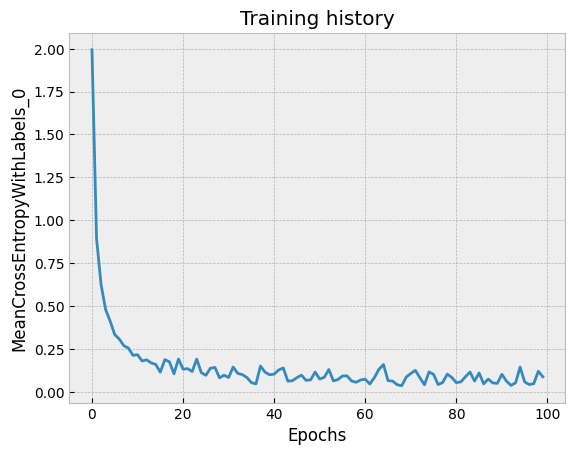

In [8]:
# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
nn.plot.plot_history(history,error_name=error.name)

In [9]:
print("Métricas del modelo:")
y_pred=model.forward(x)
y_pred_labels=nn.utils.onehot2labels(y_pred)
nn.metrics.classification_summary(y,y_pred_labels)

Métricas del modelo:
Accuracy: 0.9825 (10 classes)
Confusion matrix: (rows true, columns pred)
[[129   0   0   0   0   0   0   0   0   0]
 [  0 124   2   0   0   0   0   0   1   0]
 [  0   0 137   0   0   0   0   1   2   1]
 [  0   0   0 113   0   0   0   0   1   0]
 [  0   0   0   0 113   0   0   0   0   4]
 [  0   0   0   0   0 107   0   0   0   0]
 [  1   0   0   0   0   0 116   0   0   0]
 [  0   2   0   0   0   0   0 120   1   0]
 [  0   0   0   0   0   0   0   0 112   0]
 [  0   0   0   0   0   0   0   0   5 108]]


## Adam

In [10]:
hidden_dim=32
#Red con dos capas 
model = nn.Sequential([nn.Dense(din,hidden_dim,activation_name="relu"),
                       nn.Dense(hidden_dim,classes,activation_name="softmax"),
                      ])

error = nn.MeanError(nn.CrossEntropyWithLabels())
optimizer = nn.Adam(lr=0.01,epochs=100,batch_size=16)

optim. Sequential_1:   0%|          | 0/100 [00:00<?, ?it/s]

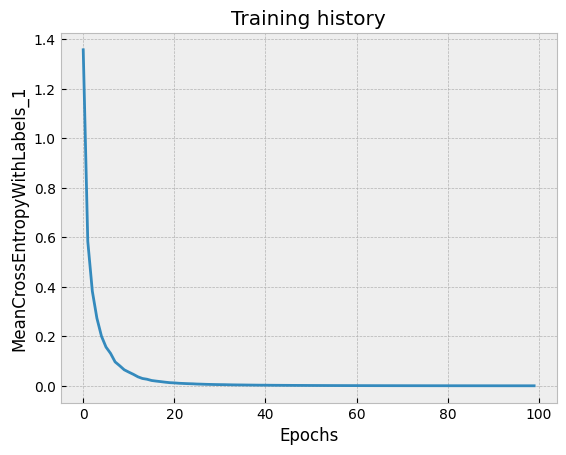

In [11]:
# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
nn.plot.plot_history(history,error_name=error.name)

In [12]:
print("Métricas del modelo:")
y_pred=model.forward(x)
y_pred_labels=nn.utils.onehot2labels(y_pred)
nn.metrics.classification_summary(y,y_pred_labels)

Métricas del modelo:
Accuracy: 1.0 (10 classes)
Confusion matrix: (rows true, columns pred)
[[129   0   0   0   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 114   0   0   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0]
 [  0   0   0   0   0 107   0   0   0   0]
 [  0   0   0   0   0   0 117   0   0   0]
 [  0   0   0   0   0   0   0 123   0   0]
 [  0   0   0   0   0   0   0   0 112   0]
 [  0   0   0   0   0   0   0   0   0 113]]
